## Introduction to Time Series
- Time Series is generally data which is collected over time and is dependent on it.
- Not every data collected with respect to time represents a time series.
- Observations are typically collected at regular intervals
    - Every second/Minute/Hourly
    - Daily, Monthly, Quarterly, Yearly


        Methods of prediction & forecasting, time based data is Time Series Modeling


### Example of time series: 

    - Stock Market Price
    - Passenger Count of an airlines
    - Temperature over time 
    - Monthly Sales Data
    - Quarterly/Annual Revenue
    - Hourly Weather Data/Wind Speed
    - IOT sensors in Industries and Smart Devices
    - Energy Forecasting

### Key Concepts of a Time Series:
1. `Trend`: Trend is a general direction in which something is developing or changing. 
2. `Seasonality`: Any predictable change or pattern in a time series that recurs or repeats over a specific time period can be said to be seasonality.
3. `Cyclic`
4. `Stationary` 


#### Difference between time series and regression
- The main difference is that a time series is time dependent. So the basic assumption of a linear regression model that the observations are independent doesn’t hold in this case.
- Along with an increasing or decreasing trend, most Time Series have some form of seasonality trends,i.e. variations specific to a particular time frame.

**Note** 

    - Predicting a time series using regression techniques is not a good approach.
    - Time series forecasting is the use of a model to predict future values based on previously observed values.


In [2]:
!pip install download

In [18]:
## Import libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import os
from datetime import datetime
from download import download
from __future__ import absolute_import, division, print_function, unicode_literals

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

# New Section

In [4]:
# Load the data
from google.colab import files
uploaded = files.upload()

Saving PRSA_Data_Dingling_20130301-20170228.csv to PRSA_Data_Dingling_20130301-20170228.csv


In [218]:
## 
print("==== Data is recorded every hour ====")
df = pd.read_csv("PRSA_Data_Dingling_20130301-20170228.csv")
display(df.head())
print("Dimension of Data :", df.shape)

==== Data is recorded every hour ====


No  year  month  day  hour  PM2.5  ...    PRES  DEWP  RAIN   wd  WSPM   station
0   1  2013      3    1     0    4.0  ...  1020.8 -19.7   0.0    E   0.5  Dingling
1   2  2013      3    1     1    7.0  ...  1021.3 -19.0   0.0  ENE   0.7  Dingling
2   3  2013      3    1     2    5.0  ...  1021.3 -19.9   0.0  ENE   0.2  Dingling
3   4  2013      3    1     3    6.0  ...  1021.8 -19.1   0.0  NNE   1.0  Dingling
4   5  2013      3    1     4    5.0  ...  1022.3 -19.4   0.0    N   2.1  Dingling

[5 rows x 18 columns]

Dimension of Data : (35064, 18)


In [219]:
## Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [220]:
## Add new column 
# Combine 'year','month','day','hour' to datetime
df['year_month_day_hour'] = pd.to_datetime(df[['year','month','day','hour']])
display(df.head(3))


No  year  month  day  hour  ...  RAIN   wd  WSPM   station  year_month_day_hour
0   1  2013      3    1     0  ...   0.0    E   0.5  Dingling  2013-03-01 00:00:00
1   2  2013      3    1     1  ...   0.0  ENE   0.7  Dingling  2013-03-01 01:00:00
2   3  2013      3    1     2  ...   0.0  ENE   0.2  Dingling  2013-03-01 02:00:00

[3 rows x 19 columns]

In [221]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   No                   35064 non-null  int64         
 1   year                 35064 non-null  int64         
 2   month                35064 non-null  int64         
 3   day                  35064 non-null  int64         
 4   hour                 35064 non-null  int64         
 5   PM2.5                34285 non-null  float64       
 6   PM10                 34408 non-null  float64       
 7   SO2                  34334 non-null  float64       
 8   NO2                  33830 non-null  float64       
 9   CO                   33052 non-null  float64       
 10  O3                   33850 non-null  float64       
 11  TEMP                 35011 non-null  float64       
 12  PRES                 35014 non-null  float64       
 13  DEWP                 35011 non-

None

In [222]:
## plotly plot
fig = px.line(df, x = 'year_month_day_hour', y = 'PM2.5', title = 'PM2.5 with Slider')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [223]:
##
fig = px.line(df, x = 'year_month_day_hour', y = 'PM2.5', title = 'PM2.5 with Slider')
fig.update_xaxes(
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list(
            [
             dict(count = 1, label = '1y', step = "year", stepmode = 'backward'),
             dict(count = 2, label = '2y', step = "year", stepmode = 'backward'),
             dict(count = 3, label = '3y', step = "year", stepmode = 'backward'),
             dict(step = "all"),
            ]
        )
    )
)

fig.show()

In [224]:
###
fig = px.line(df, x = 'year_month_day_hour', y = 'TEMP', title = 'TEMP with Slider')
fig.update_xaxes(
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list(
            [
             dict(count = 1, label = '1y', step = "year", stepmode = 'backward'),
             dict(count = 2, label = '2y', step = "year", stepmode = 'backward'),
             dict(count = 3, label = '3y', step = "year", stepmode = 'backward'),
             dict(step = "all"),
            ]
        )
    )
)

fig.show()

## Here data is hourly data

In [225]:
aq_df = df.set_index('year_month_day_hour')
aq_df.head()

No  year  month  day  ...  RAIN   wd  WSPM   station
year_month_day_hour                        ...                           
2013-03-01 00:00:00   1  2013      3    1  ...   0.0    E   0.5  Dingling
2013-03-01 01:00:00   2  2013      3    1  ...   0.0  ENE   0.7  Dingling
2013-03-01 02:00:00   3  2013      3    1  ...   0.0  ENE   0.2  Dingling
2013-03-01 03:00:00   4  2013      3    1  ...   0.0  NNE   1.0  Dingling
2013-03-01 04:00:00   5  2013      3    1  ...   0.0    N   2.1  Dingling

[5 rows x 18 columns]

In [226]:
aq_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-03-01 00:00:00 to 2017-02-28 23:00:00
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 5.1+ MB


In [227]:
### for future analysis on month 
aq_df['month'] = pd.to_numeric(aq_df['month'])

In [228]:
print("Rows    : ", aq_df.shape[0])
print("Columns : ", aq_df.shape[1])
print("\nFeatures: \n", aq_df.columns.tolist())
print("\nMissing Values:\n", aq_df.isnull().any())
print("\nUnique values : \n", aq_df.nunique())

Rows    :  35064
Columns :  18

Features: 
 ['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']

Missing Values:
 No         False
year       False
month      False
day        False
hour       False
PM2.5       True
PM10        True
SO2         True
NO2         True
CO          True
O3          True
TEMP        True
PRES        True
DEWP        True
RAIN        True
wd          True
WSPM        True
station    False
dtype: bool

Unique values : 
 No         35064
year           5
month         12
day           31
hour          24
PM2.5        486
PM10         554
SO2          327
NO2          636
CO           103
O3           792
TEMP         998
PRES         593
DEWP         602
RAIN         116
wd            16
WSPM          95
station        1
dtype: int64


## Imputation

In [229]:
print("Missing Values in Each Column: \n", aq_df.isnull().sum())

Missing Values in Each Column: 
 No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64


In [230]:
##
aq_df.query('TEMP != TEMP').head()

No  year  month  day  ...  RAIN   wd  WSPM   station
year_month_day_hour                           ...                           
2015-01-27 20:00:00  16749  2015      1   27  ...   NaN  NaN   NaN  Dingling
2015-01-30 13:00:00  16814  2015      1   30  ...   NaN  NaN   NaN  Dingling
2015-01-31 05:00:00  16830  2015      1   31  ...   NaN  NaN   NaN  Dingling
2015-02-02 01:00:00  16874  2015      2    2  ...   NaN  NaN   NaN  Dingling
2015-02-02 11:00:00  16884  2015      2    2  ...   NaN  NaN   NaN  Dingling

[5 rows x 18 columns]

In [231]:
##
aq_df.query('TEMP != TEMP').count()

No         53
year       53
month      53
day        53
hour       53
PM2.5      53
PM10       53
SO2        53
NO2        53
CO         53
O3         53
TEMP        0
PRES        3
DEWP        0
RAIN        3
wd         10
WSPM       10
station    53
dtype: int64

In [232]:
##
aq_df[aq_df['PM2.5'].isnull()]

No  year  month  day  ...  RAIN   wd  WSPM   station
year_month_day_hour                           ...                           
2013-04-01 08:00:00    753  2013      4    1  ...   0.0   NW   7.2  Dingling
2013-04-01 09:00:00    754  2013      4    1  ...   0.0  NNW   4.5  Dingling
2013-04-01 10:00:00    755  2013      4    1  ...   0.0  NNW   4.5  Dingling
2013-04-01 11:00:00    756  2013      4    1  ...   0.0  NNE   4.0  Dingling
2013-04-01 12:00:00    757  2013      4    1  ...   0.0   NE   5.0  Dingling
...                    ...   ...    ...  ...  ...   ...  ...   ...       ...
2017-02-20 15:00:00  34864  2017      2   20  ...   0.0  WNW   3.1  Dingling
2017-02-20 16:00:00  34865  2017      2   20  ...   0.0  WNW   3.4  Dingling
2017-02-20 18:00:00  34867  2017      2   20  ...   0.0   NE   1.1  Dingling
2017-02-21 11:00:00  34884  2017      2   21  ...   0.0  ESE   1.9  Dingling
2017-02-21 13:00:00  34886  2017      2   21  ...   0.0   SW   1.7  Dingling

[779 rows x 18 columns]

In [233]:
## Description of the dataset
aq_df.describe()


No          year  ...          RAIN          WSPM
count  35064.000000  35064.000000  ...  35013.000000  35021.000000
mean   17532.500000   2014.662560  ...      0.060366      1.853836
std    10122.249256      1.177213  ...      0.752899      1.309808
min        1.000000   2013.000000  ...      0.000000      0.000000
25%     8766.750000   2014.000000  ...      0.000000      1.000000
50%    17532.500000   2015.000000  ...      0.000000      1.500000
75%    26298.250000   2016.000000  ...      0.000000      2.300000
max    35064.000000   2017.000000  ...     52.100000     10.000000

[8 rows x 16 columns]

In [234]:
# ## Set index
# aq_df = aq_df.set_index('year_month_day_hour')
# print(aq_df.index)
# display(aq_df.head())

In [235]:
## check for indexing
aq_df.loc['2013-03-01':'2013-03-05']

No  year  month  day  ...  RAIN   wd  WSPM   station
year_month_day_hour                         ...                           
2013-03-01 00:00:00    1  2013      3    1  ...   0.0    E   0.5  Dingling
2013-03-01 01:00:00    2  2013      3    1  ...   0.0  ENE   0.7  Dingling
2013-03-01 02:00:00    3  2013      3    1  ...   0.0  ENE   0.2  Dingling
2013-03-01 03:00:00    4  2013      3    1  ...   0.0  NNE   1.0  Dingling
2013-03-01 04:00:00    5  2013      3    1  ...   0.0    N   2.1  Dingling
...                  ...   ...    ...  ...  ...   ...  ...   ...       ...
2013-03-05 19:00:00  116  2013      3    5  ...   0.0  NNE   0.2  Dingling
2013-03-05 20:00:00  117  2013      3    5  ...   0.0  NNE   0.7  Dingling
2013-03-05 21:00:00  118  2013      3    5  ...   0.0  NNE   0.2  Dingling
2013-03-05 22:00:00  119  2013      3    5  ...   0.0    N   1.7  Dingling
2013-03-05 23:00:00  120  2013      3    5  ...   0.0   NE   0.4  Dingling

[120 rows x 18 columns]

In [236]:
# aq_df.loc['2013': '2015']

year_month_day_hour
2013-03-01 00:00:00    4.0
2013-03-01 01:00:00    7.0
2013-03-01 02:00:00    5.0
2013-03-01 03:00:00    6.0
2013-03-01 04:00:00    5.0
Name: PM2.5, dtype: float64


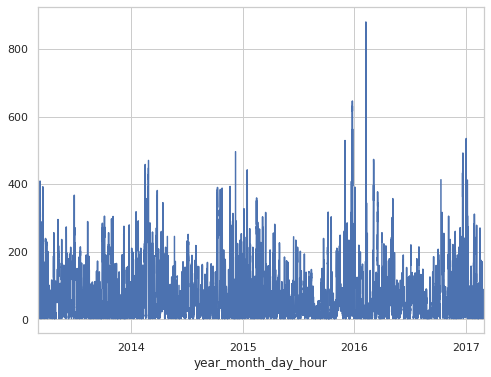

In [237]:
## Target variable 'PM2.5'
pm_data =  aq_df['PM2.5']
print(pm_data.head())

## Plot
pm_data.plot(grid=True)

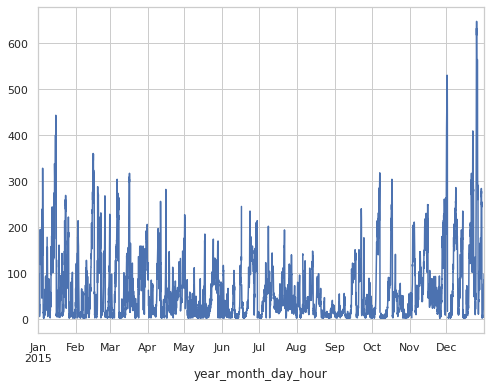

In [238]:
## Visualization of just year '2015'
aq_df_2015 = aq_df.loc['2015']
pm_data_2015 = aq_df_2015['PM2.5']
pm_data_2015.plot(grid=True)

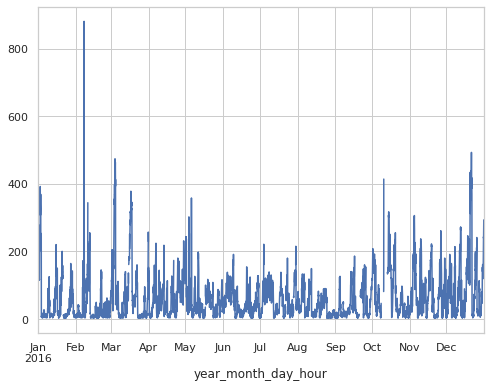

In [239]:
## Visualization of just year '2016'
aq_df_2016 = aq_df.loc['2016']
pm_data_2016 = aq_df_2016['PM2.5']
pm_data_2016.plot(grid=True)

In [240]:
# aq_df['2013']
df_2014['month']

0        1
1        1
2        1
3        1
4        1
        ..
8755    12
8756    12
8757    12
8758    12
8759    12
Name: month, Length: 8760, dtype: int64

Text(0.5, 1.0, 'Air Quality plot for the year 2014 and 2016')

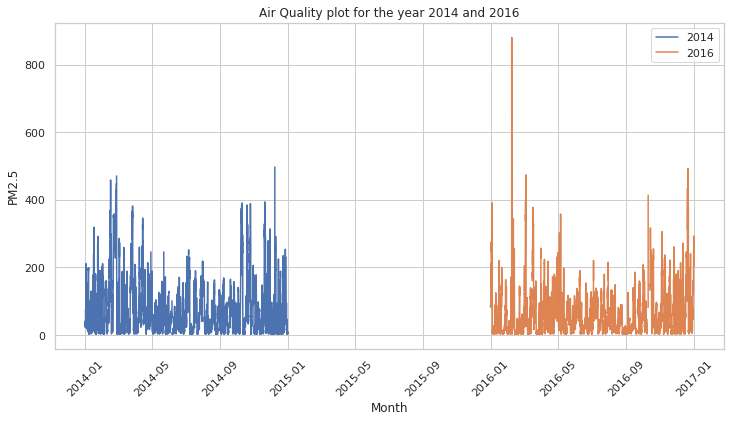

In [241]:
## Air Quality plot for the year 2014 and 2016
plt.figure(figsize=(12,6))
plt.plot(aq_df.loc['2014']['PM2.5'])
plt.plot(aq_df.loc['2016']['PM2.5'])
plt.xticks(rotation=45)
plt.legend(['2014', '2016'])
plt.xlabel('Month')
plt.ylabel('PM2.5')
plt.title('Air Quality plot for the year 2014 and 2016')

        PM2.5                                                       
        count       mean         std  min   25%   50%     75%    max
month                                                               
1      2173.0  70.285274   75.913587  3.0  12.0  38.0  113.00  443.0
2      1978.0  86.389282  105.603069  3.0  10.0  33.0  132.00  881.0
3      2212.0  80.193852   87.889440  3.0  13.0  47.0  123.25  474.0
4      2105.0  67.963325   56.430235  3.0  25.0  54.0   95.00  346.0
5      2188.0  47.994378   44.843130  3.0  16.0  35.0   67.00  358.0
6      2119.0  46.655403   43.877349  3.0  13.0  31.0   69.00  245.0
7      2205.0  61.671474   50.926149  3.0  21.0  48.0   91.00  252.0
8      2206.0  41.364869   37.279312  3.0  13.0  29.0   60.00  217.0
9      2074.0  45.356123   43.235331  3.0  11.0  27.0   78.00  240.0
10     2081.0  82.586257   92.234361  3.0  13.0  43.0  124.00  414.0
11     2141.0  77.500140   71.720648  3.0  20.0  56.0  112.00  394.0
12     2186.0  87.990851  104.6770

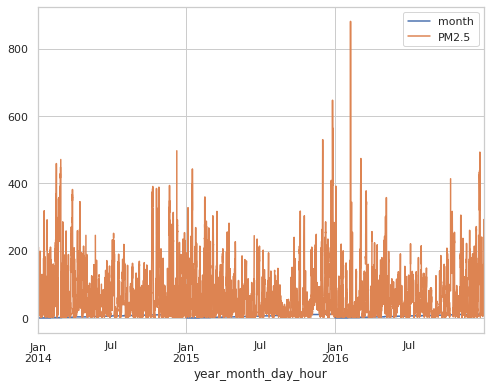

In [242]:
## Univariate Analysis
print(aq_df['2014':'2016'][['month', 'PM2.5']].groupby('month').describe())
aq_df['2014':'2016'][['month', 'PM2.5']].plot()

In [243]:
## Bivariate Analysis
aq_df['2014':'2016'][['month', 'PM2.5', 'TEMP']].groupby('month').agg({'PM2.5':['max'], 'TEMP':['min', 'max']})

PM2.5  TEMP      
         max   min   max
month                   
1      443.0 -16.6  12.4
2      881.0 -10.9  14.0
3      474.0  -6.4  26.0
4      346.0   1.3  32.0
5      358.0   7.0  41.4
6      245.0  15.1  38.1
7      252.0  16.8  39.2
8      217.0  16.6  36.3
9      240.0   7.8  34.5
10     414.0  -1.4  28.1
11     394.0 -10.3  20.8
12     647.0  -9.7  11.6

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7824f48a58>,
      dtype=object)

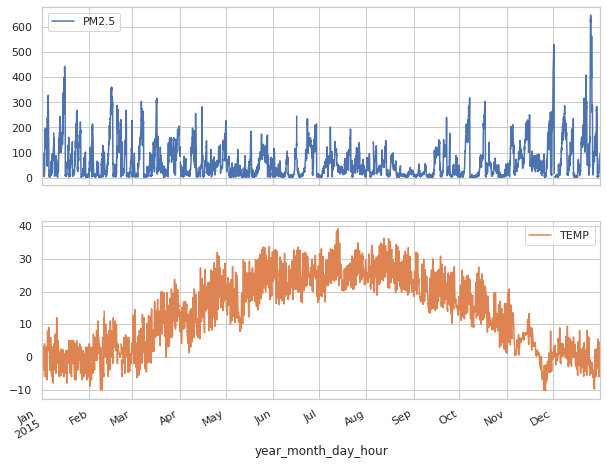

In [244]:
##
aq_df_2015 = aq_df['2015']
pm_data_2015 = aq_df_2015[['PM2.5', 'TEMP']]
pm_data_2015.plot(subplots = True, figsize=(10,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f782500a940>,
      dtype=object)

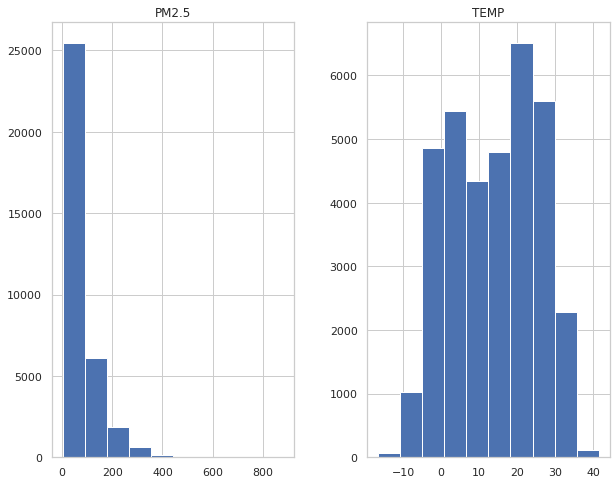

In [245]:
##
aq_df[['PM2.5', 'TEMP']].hist(figsize=(10,8))

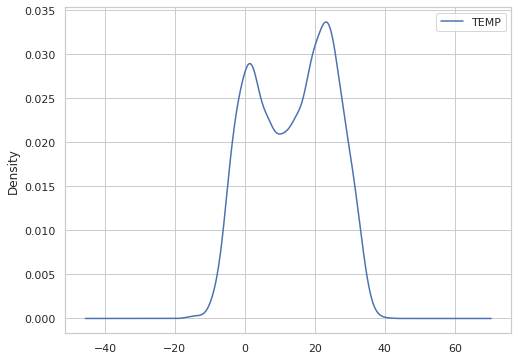

In [246]:
##
aq_df[['TEMP']].plot(kind = 'density')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


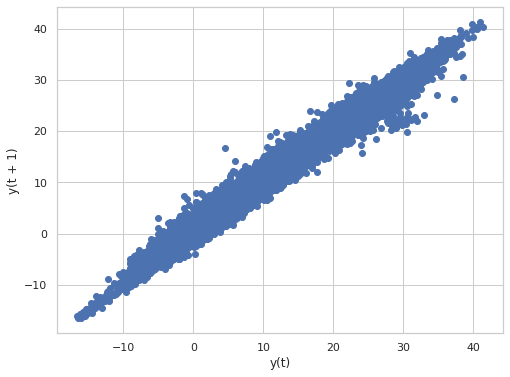

In [247]:
##
pd.plotting.lag_plot(aq_df['TEMP'], lag = 1)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


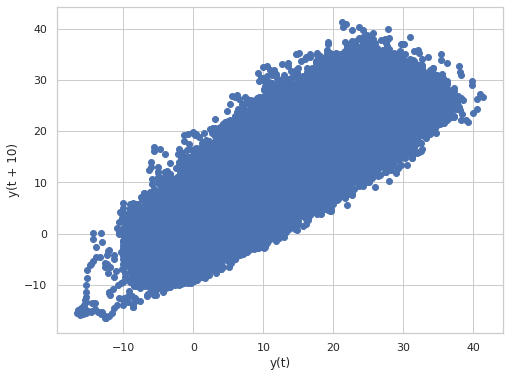

In [248]:
##
pd.plotting.lag_plot(aq_df['TEMP'], lag = 10) ## 10 hours because data is hourly

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


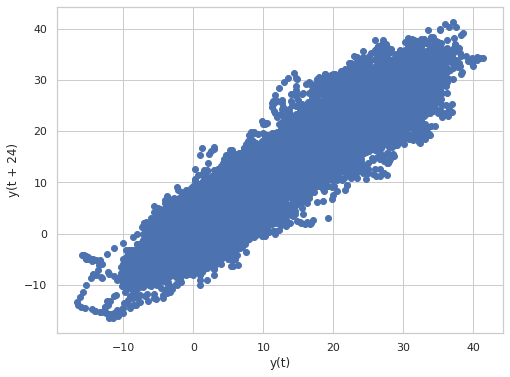

In [249]:
##
pd.plotting.lag_plot(aq_df['TEMP'], lag = 24)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


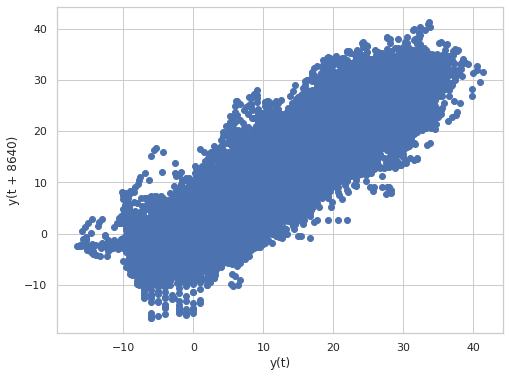

In [250]:
##
pd.plotting.lag_plot(aq_df['TEMP'], lag = 8640) # 365*24=8640

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


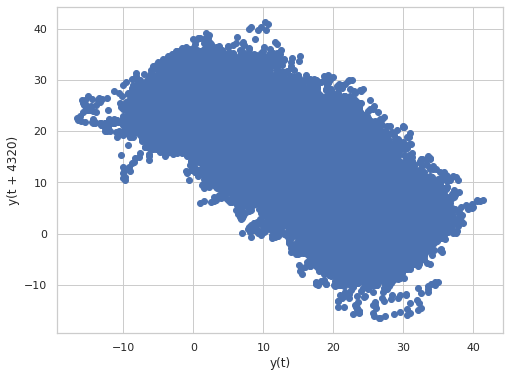

In [251]:
##
pd.plotting.lag_plot(aq_df['TEMP'], lag = 4320)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


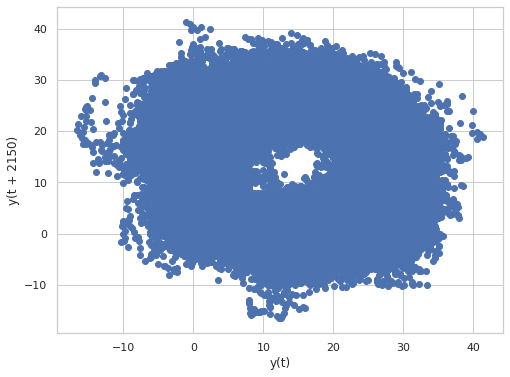

In [252]:
##
pd.plotting.lag_plot(aq_df['TEMP'], lag = 2150)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f78251d1780>,
      dtype=object)

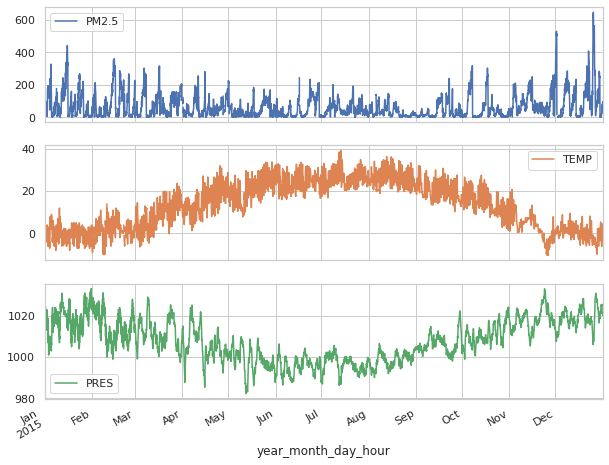

In [253]:
## Multivariate Analysis
aq_df_2015 = aq_df['2015']
pm_data_2015 = aq_df_2015[['PM2.5', 'TEMP', 'PRES']]
pm_data_2015.plot(subplots = True, figsize=(10,8))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f78251d1cf8>,
      dtype=object)

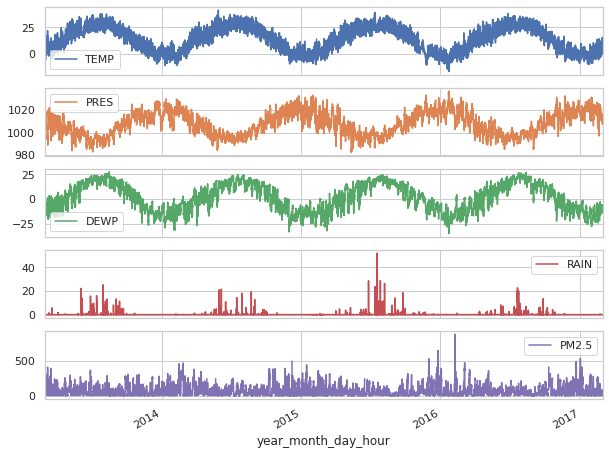

In [254]:
##
multi_data = aq_df[['TEMP', "PRES", 'DEWP', 'RAIN', 'PM2.5']]
multi_data.plot(subplots = True, figsize=(10,8))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7825400438>,
      dtype=object)

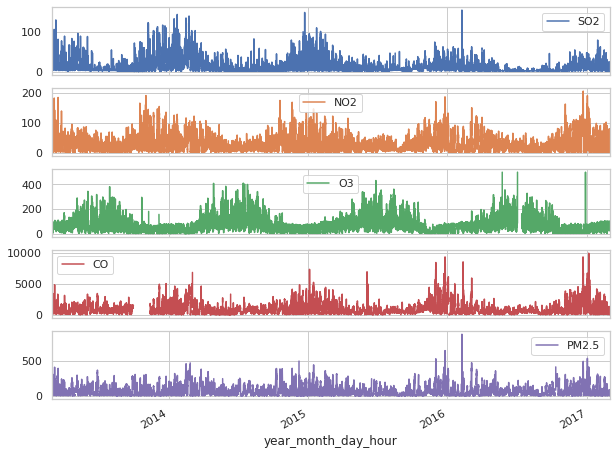

In [255]:
##
multi_data = aq_df[['SO2', "NO2", 'O3', 'CO', 'PM2.5']]
multi_data.plot(subplots = True, figsize=(10,8))

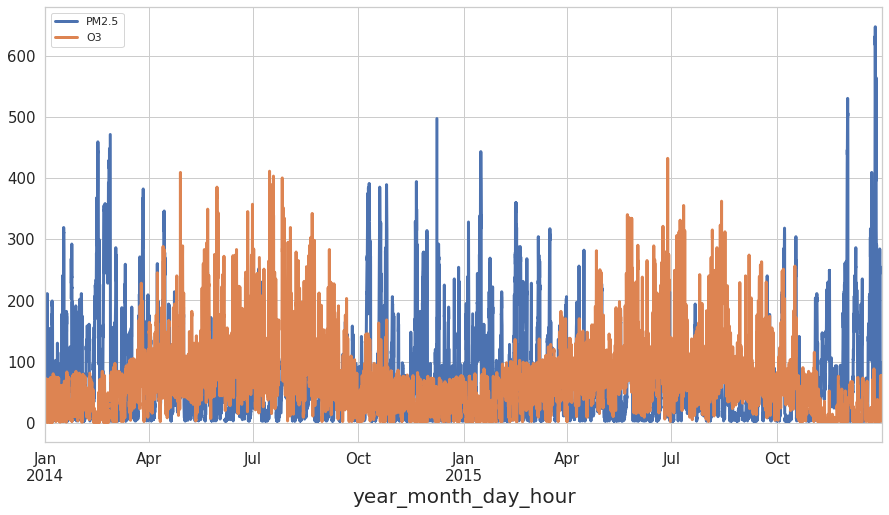

In [256]:
##
aq_df['2014':'2015'][['PM2.5', 'O3']].plot(figsize=(15,8), linewidth=3, fontsize=15)
plt.xlabel('year_month_day_hour', fontsize=20);

In [257]:
##
aq_df_2015['PM2.5']

year_month_day_hour
2015-01-01 00:00:00     NaN
2015-01-01 01:00:00     NaN
2015-01-01 02:00:00     NaN
2015-01-01 03:00:00     NaN
2015-01-01 04:00:00     NaN
                       ... 
2015-12-31 19:00:00    85.0
2015-12-31 20:00:00     NaN
2015-12-31 21:00:00    80.0
2015-12-31 22:00:00    93.0
2015-12-31 23:00:00    98.0
Name: PM2.5, Length: 8760, dtype: float64

In [258]:
aq_df_2015

No  year  month  day  ...  RAIN   wd  WSPM   station
year_month_day_hour                           ...                           
2015-01-01 00:00:00  16105  2015      1    1  ...   0.0   NW   3.3  Dingling
2015-01-01 01:00:00  16106  2015      1    1  ...   0.0  NNE   1.2  Dingling
2015-01-01 02:00:00  16107  2015      1    1  ...   0.0  NNW   1.7  Dingling
2015-01-01 03:00:00  16108  2015      1    1  ...   0.0    N   1.7  Dingling
2015-01-01 04:00:00  16109  2015      1    1  ...   0.0   NE   1.8  Dingling
...                    ...   ...    ...  ...  ...   ...  ...   ...       ...
2015-12-31 19:00:00  24860  2015     12   31  ...   0.0   NE   0.6  Dingling
2015-12-31 20:00:00  24861  2015     12   31  ...   0.0   NW   1.1  Dingling
2015-12-31 21:00:00  24862  2015     12   31  ...   0.0   NE   0.9  Dingling
2015-12-31 22:00:00  24863  2015     12   31  ...   0.0  NNW   1.3  Dingling
2015-12-31 23:00:00  24864  2015     12   31  ...   0.0  NNW   1.3  Dingling

[8760 rows x 18 columns]

In [259]:
##
aq_df.isnull().values.any()

True

In [260]:
##
aq_df.isnull().any()

No         False
year       False
month      False
day        False
hour       False
PM2.5       True
PM10        True
SO2         True
NO2         True
CO          True
O3          True
TEMP        True
PRES        True
DEWP        True
RAIN        True
wd          True
WSPM        True
station    False
dtype: bool

In [261]:
##
df.isnull().sum()

No                        0
year                      0
month                     0
day                       0
hour                      0
PM2.5                   779
PM10                    656
SO2                     730
NO2                    1234
CO                     2012
O3                     1214
TEMP                     53
PRES                     50
DEWP                     53
RAIN                     51
wd                      140
WSPM                     43
station                   0
year_month_day_hour       0
dtype: int64

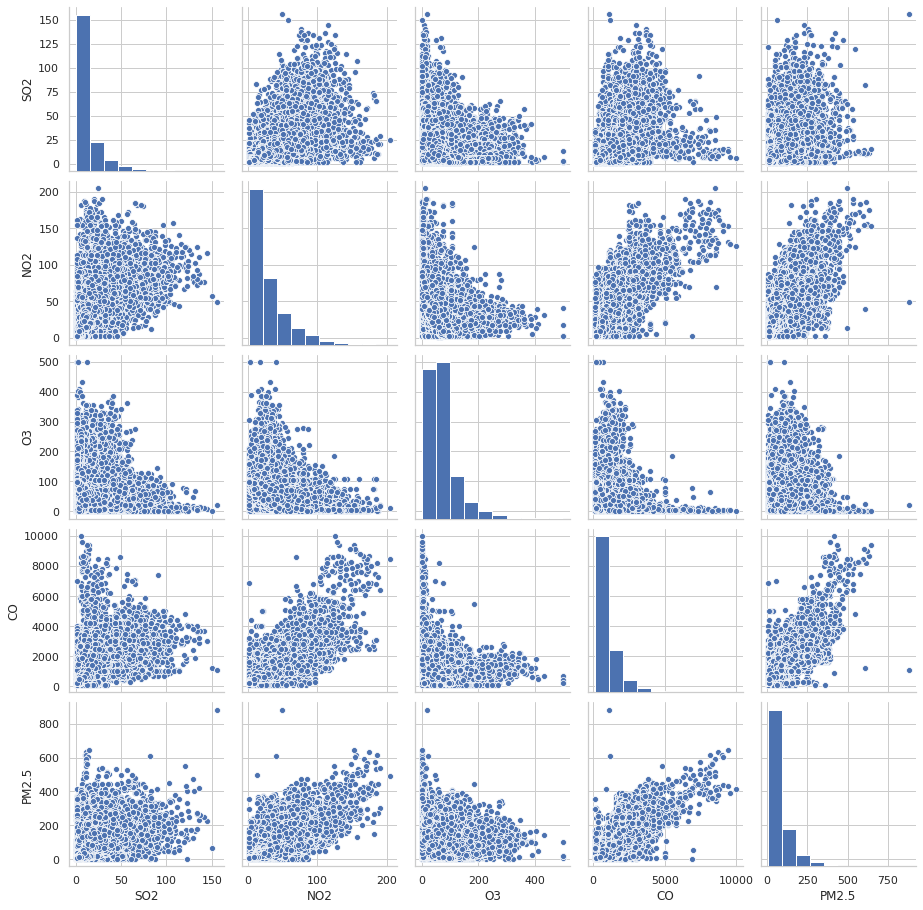

In [262]:
##
g = sns.pairplot(aq_df[['SO2', 'NO2', 'O3', 'CO', 'PM2.5']])

In [263]:
##
aq_corr = aq_df[['SO2', 'NO2', 'O3', 'CO', 'PM2.5']].corr(method = 'pearson')
aq_corr

SO2       NO2        O3        CO     PM2.5
SO2    1.000000  0.610433 -0.182096  0.529182  0.475117
NO2    0.610433  1.000000 -0.373625  0.798753  0.718170
O3    -0.182096 -0.373625  1.000000 -0.303275 -0.100542
CO     0.529182  0.798753 -0.303275  1.000000  0.802737
PM2.5  0.475117  0.718170 -0.100542  0.802737  1.000000

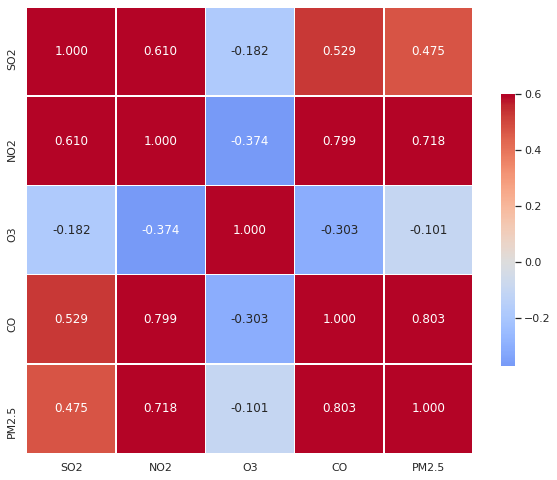

In [264]:
g = sns.heatmap(aq_corr, vmax = 0.6, center = 0,
                square = True, linewidths = 0.5,
                cbar_kws = {"shrink": 0.5},
                annot=True, fmt='.3f', cmap='coolwarm')
g.figure.set_size_inches(10, 10)

plt.show()

In [265]:

## Wind direction
aq_df.groupby('wd').agg(median=('PM2.5', 'median'), mean=('PM2.5', 'mean'), 
                        max=('PM2.5', 'max'), min=('PM2.5', 'min')).reset_index()

wd  median       mean    max  min
0     E    70.0  88.623363  434.0  3.0
1   ENE    56.5  77.685514  647.0  3.0
2   ESE    78.5  96.492276  632.0  3.0
3     N    29.0  57.546221  536.0  3.0
4    NE    32.0  57.390083  530.0  3.0
5   NNE    26.0  53.946239  881.0  3.0
6   NNW    33.0  62.790775  548.0  3.0
7    NW    21.0  52.769116  535.0  3.0
8     S    52.0  72.497281  511.0  3.0
9    SE    70.0  85.045709  617.0  3.0
10  SSE    61.0  79.925967  614.0  3.0
11  SSW    50.0  73.078253  493.0  3.0
12   SW    46.0  70.233140  459.0  3.0
13    W    22.0  49.488104  446.0  3.0
14  WNW    14.0  37.307447  515.0  3.0
15  WSW    39.0  66.725926  451.0  3.0

## Handling Missing Value in Time Series Data using Python

In [266]:
## Dropping Null Values
aq_df_na = aq_df.copy()
aq_df_na = aq_df_na.dropna()


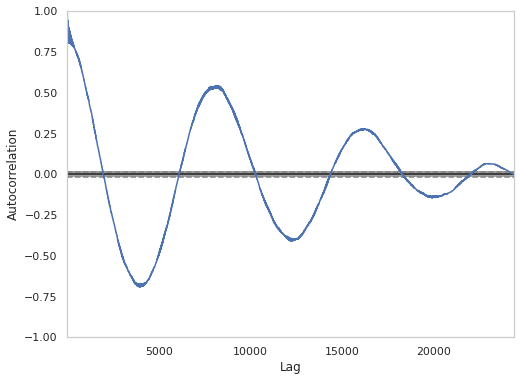

In [267]:
pd.plotting.autocorrelation_plot(aq_df_na['2014':'2016']['TEMP'])

In [268]:
##
aq_df_na['TEMP'].resample("m").mean()

year_month_day_hour
2013-03-31     6.039970
2013-04-30    12.208494
2013-05-31    21.886386
2013-06-30    23.752827
2013-07-31    27.405079
2013-08-31    27.228465
2013-09-30    20.482500
2013-10-31          NaN
2013-11-30     5.434524
2013-12-31     0.896623
2014-01-31     0.023428
2014-02-28    -0.352762
2014-03-31    10.415449
2014-04-30    17.235362
2014-05-31    22.043236
2014-06-30    25.194985
2014-07-31    28.409502
2014-08-31    26.284552
2014-09-30    20.834161
2014-10-31    13.556000
2014-11-30     6.357762
2014-12-31    -0.745582
2015-01-31    -0.590377
2015-02-28     1.572512
2015-03-31     8.707613
2015-04-30    15.566570
2015-05-31    21.300275
2015-06-30    24.636691
2015-07-31    26.228630
2015-08-31    26.135854
2015-09-30    20.392206
2015-10-31    14.387465
2015-11-30     3.358686
2015-12-31    -0.053912
2016-01-31    -4.233428
2016-02-29     1.434441
2016-03-31     8.687006
2016-04-30    16.262014
2016-05-31    20.793142
2016-06-30    25.481977
2016-07-31    25.839

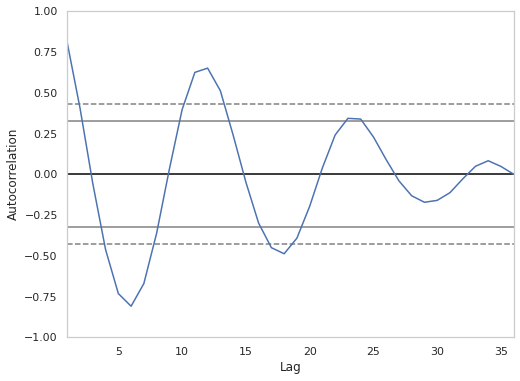

In [269]:
##
pd.plotting.autocorrelation_plot(aq_df_na['2014':'2016']['TEMP'].resample("m").mean())

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


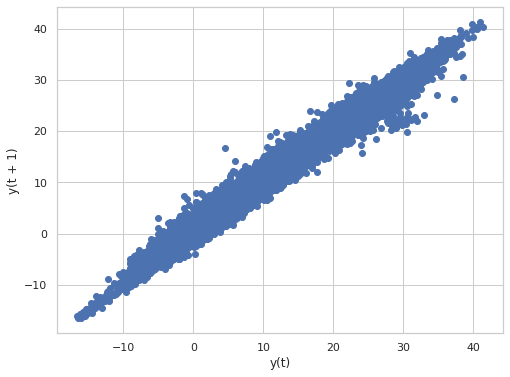

In [270]:
##
pd.plotting.lag_plot(aq_df['TEMP'], lag = 1)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


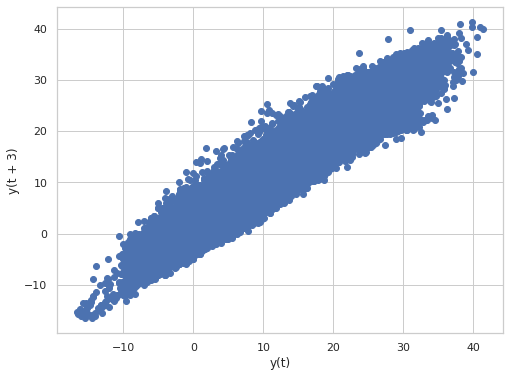

In [271]:
##
pd.plotting.lag_plot(aq_df['TEMP'], lag = 3)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


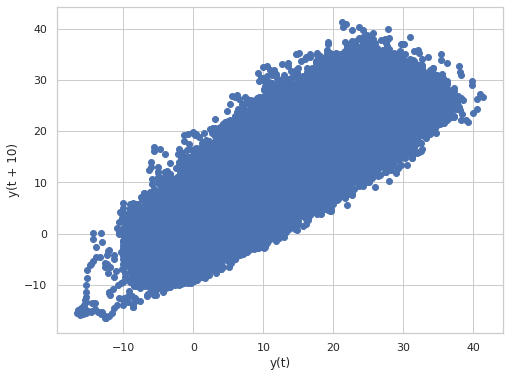

In [272]:
##
pd.plotting.lag_plot(aq_df['TEMP'], lag = 10)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


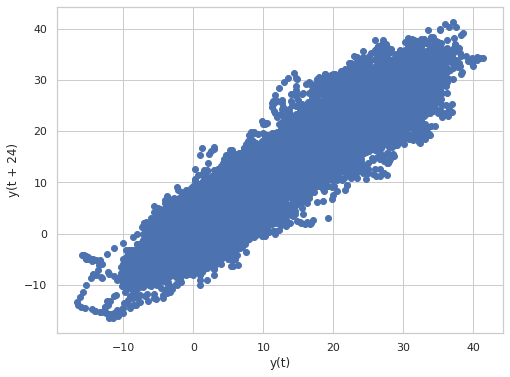

In [273]:
##
pd.plotting.lag_plot(aq_df['TEMP'], lag = 24)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


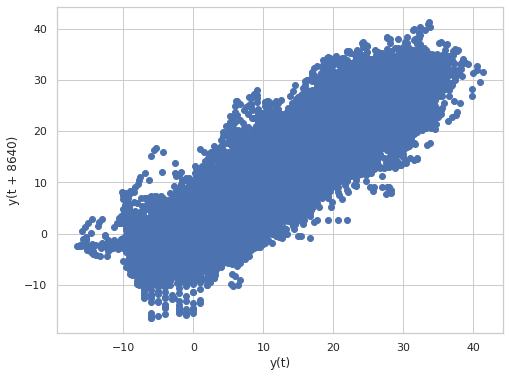

In [274]:
##
pd.plotting.lag_plot(aq_df['TEMP'], lag = 8640) # 365*24=8640

In [275]:
aq_df['2015-02-21 10': '2015-02-21 20']

No  year  month  day  ...  RAIN   wd  WSPM   station
year_month_day_hour                           ...                           
2015-02-21 10:00:00  17339  2015      2   21  ...   0.0   SW   1.1  Dingling
2015-02-21 11:00:00  17340  2015      2   21  ...   0.0  SSW   1.2  Dingling
2015-02-21 12:00:00  17341  2015      2   21  ...   NaN  NaN   NaN  Dingling
2015-02-21 13:00:00  17342  2015      2   21  ...   0.0   SW   1.6  Dingling
2015-02-21 14:00:00  17343  2015      2   21  ...   NaN  NaN   NaN  Dingling
2015-02-21 15:00:00  17344  2015      2   21  ...   0.0    W   9.6  Dingling
2015-02-21 16:00:00  17345  2015      2   21  ...   0.0   NW   9.0  Dingling
2015-02-21 17:00:00  17346  2015      2   21  ...   0.0  WNW   6.4  Dingling
2015-02-21 18:00:00  17347  2015      2   21  ...   0.0   NW   7.3  Dingling
2015-02-21 19:00:00  17348  2015      2   21  ...   0.0   NW   5.7  Dingling
2015-02-21 20:00:00  17349  2015      2   21  ...   NaN  NaN   NaN  Dingling

[11 rows x 18 columns]

In [276]:
aq_df_imp = aq_df['2015-02-21 10': '2015-02-21 23'][['TEMP']]
aq_df_imp

TEMP
year_month_day_hour      
2015-02-21 10:00:00   1.0
2015-02-21 11:00:00   1.0
2015-02-21 12:00:00   NaN
2015-02-21 13:00:00   2.0
2015-02-21 14:00:00   NaN
2015-02-21 15:00:00   4.0
2015-02-21 16:00:00   4.0
2015-02-21 17:00:00   3.0
2015-02-21 18:00:00   2.0
2015-02-21 19:00:00   1.0
2015-02-21 20:00:00   NaN
2015-02-21 21:00:00  -1.0
2015-02-21 22:00:00  -1.0
2015-02-21 23:00:00  -2.0

In [277]:
## forward fill
aq_df_imp['TEMP_FFILL'] = aq_df_imp['TEMP'].fillna(method='ffill')
aq_df_imp

TEMP  TEMP_FFILL
year_month_day_hour                  
2015-02-21 10:00:00   1.0         1.0
2015-02-21 11:00:00   1.0         1.0
2015-02-21 12:00:00   NaN         1.0
2015-02-21 13:00:00   2.0         2.0
2015-02-21 14:00:00   NaN         2.0
2015-02-21 15:00:00   4.0         4.0
2015-02-21 16:00:00   4.0         4.0
2015-02-21 17:00:00   3.0         3.0
2015-02-21 18:00:00   2.0         2.0
2015-02-21 19:00:00   1.0         1.0
2015-02-21 20:00:00   NaN         1.0
2015-02-21 21:00:00  -1.0        -1.0
2015-02-21 22:00:00  -1.0        -1.0
2015-02-21 23:00:00  -2.0        -2.0

In [278]:
## backward fill
aq_df_imp['TEMP_BFILL'] = aq_df_imp['TEMP'].fillna(method='bfill')
aq_df_imp

TEMP  TEMP_FFILL  TEMP_BFILL
year_month_day_hour                              
2015-02-21 10:00:00   1.0         1.0         1.0
2015-02-21 11:00:00   1.0         1.0         1.0
2015-02-21 12:00:00   NaN         1.0         2.0
2015-02-21 13:00:00   2.0         2.0         2.0
2015-02-21 14:00:00   NaN         2.0         4.0
2015-02-21 15:00:00   4.0         4.0         4.0
2015-02-21 16:00:00   4.0         4.0         4.0
2015-02-21 17:00:00   3.0         3.0         3.0
2015-02-21 18:00:00   2.0         2.0         2.0
2015-02-21 19:00:00   1.0         1.0         1.0
2015-02-21 20:00:00   NaN         1.0        -1.0
2015-02-21 21:00:00  -1.0        -1.0        -1.0
2015-02-21 22:00:00  -1.0        -1.0        -1.0
2015-02-21 23:00:00  -2.0        -2.0        -2.0

In [279]:
## Rolling window
aq_df_imp['TEMP_ROLLING'] = aq_df_imp['TEMP'].rolling(window=2, min_periods=1).mean()
aq_df_imp

TEMP  TEMP_FFILL  TEMP_BFILL  TEMP_ROLLING
year_month_day_hour                                            
2015-02-21 10:00:00   1.0         1.0         1.0           1.0
2015-02-21 11:00:00   1.0         1.0         1.0           1.0
2015-02-21 12:00:00   NaN         1.0         2.0           1.0
2015-02-21 13:00:00   2.0         2.0         2.0           2.0
2015-02-21 14:00:00   NaN         2.0         4.0           2.0
2015-02-21 15:00:00   4.0         4.0         4.0           4.0
2015-02-21 16:00:00   4.0         4.0         4.0           4.0
2015-02-21 17:00:00   3.0         3.0         3.0           3.5
2015-02-21 18:00:00   2.0         2.0         2.0           2.5
2015-02-21 19:00:00   1.0         1.0         1.0           1.5
2015-02-21 20:00:00   NaN         1.0        -1.0           1.0
2015-02-21 21:00:00  -1.0        -1.0        -1.0          -1.0
2015-02-21 22:00:00  -1.0        -1.0        -1.0          -1.0
2015-02-21 23:00:00  -2.0        -2.0        -2.0          -1.5

In [280]:
## 
aq_df.loc[aq_df_imp.index + pd.offsets.DateOffset(years = -1)]['TEMP']

year_month_day_hour
2014-02-21 10:00:00    1.4
2014-02-21 11:00:00    2.4
2014-02-21 12:00:00    3.0
2014-02-21 13:00:00    3.8
2014-02-21 14:00:00    3.5
2014-02-21 15:00:00    3.6
2014-02-21 16:00:00    3.3
2014-02-21 17:00:00    2.8
2014-02-21 18:00:00    1.3
2014-02-21 19:00:00    0.7
2014-02-21 20:00:00    1.2
2014-02-21 21:00:00    1.1
2014-02-21 22:00:00    0.7
2014-02-21 23:00:00    0.6
Freq: H, Name: TEMP, dtype: float64

In [281]:
##
aq_df_imp = aq_df_imp.reset_index()
aq_df_imp

year_month_day_hour  TEMP  TEMP_FFILL  TEMP_BFILL  TEMP_ROLLING
0  2015-02-21 10:00:00   1.0         1.0         1.0           1.0
1  2015-02-21 11:00:00   1.0         1.0         1.0           1.0
2  2015-02-21 12:00:00   NaN         1.0         2.0           1.0
3  2015-02-21 13:00:00   2.0         2.0         2.0           2.0
4  2015-02-21 14:00:00   NaN         2.0         4.0           2.0
5  2015-02-21 15:00:00   4.0         4.0         4.0           4.0
6  2015-02-21 16:00:00   4.0         4.0         4.0           4.0
7  2015-02-21 17:00:00   3.0         3.0         3.0           3.5
8  2015-02-21 18:00:00   2.0         2.0         2.0           2.5
9  2015-02-21 19:00:00   1.0         1.0         1.0           1.5
10 2015-02-21 20:00:00   NaN         1.0        -1.0           1.0
11 2015-02-21 21:00:00  -1.0        -1.0        -1.0          -1.0
12 2015-02-21 22:00:00  -1.0        -1.0        -1.0          -1.0
13 2015-02-21 23:00:00  -2.0        -2.0        -2.0          -1.5

In [282]:
##
aq_df_imp['TEMP_PREVY'] = aq_df_imp.apply(lambda x: aq_df.loc[x['year_month_day_hour'] - pd.offsets.DateOffset(years = -1)]['TEMP'] \
                                          if pd.isna(x['TEMP']) else x['TEMP'], axis=1)
aq_df_imp

year_month_day_hour  TEMP  TEMP_FFILL  TEMP_BFILL  TEMP_ROLLING  TEMP_PREVY
0  2015-02-21 10:00:00   1.0         1.0         1.0           1.0         1.0
1  2015-02-21 11:00:00   1.0         1.0         1.0           1.0         1.0
2  2015-02-21 12:00:00   NaN         1.0         2.0           1.0         1.9
3  2015-02-21 13:00:00   2.0         2.0         2.0           2.0         2.0
4  2015-02-21 14:00:00   NaN         2.0         4.0           2.0         4.9
5  2015-02-21 15:00:00   4.0         4.0         4.0           4.0         4.0
6  2015-02-21 16:00:00   4.0         4.0         4.0           4.0         4.0
7  2015-02-21 17:00:00   3.0         3.0         3.0           3.5         3.0
8  2015-02-21 18:00:00   2.0         2.0         2.0           2.5         2.0
9  2015-02-21 19:00:00   1.0         1.0         1.0           1.5         1.0
10 2015-02-21 20:00:00   NaN         1.0        -1.0           1.0         3.0
11 2015-02-21 21:00:00  -1.0        -1.0        -1.0          -1.0        -1.0
12 2015-02-21 22:00:00  -1.0        -1.0        -1.0          -1.0        -1.0
13 2015-02-21 23:00:00  -2.0        -2.0        -2.0          -1.5        -2.0

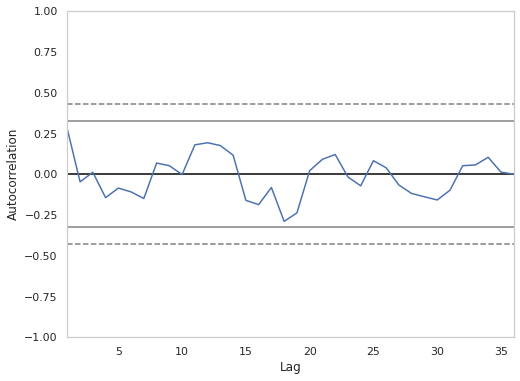

In [283]:
##
pd.plotting.autocorrelation_plot(aq_df_na['2014':'2016']['PM2.5'].resample('m').mean())